![Curso de Visión Artificial](imagenes/encabezado.png)




# OPERACIONES MORFOLÓGICAS

La morfología es el estudio de las formas. Así, las operaciones morfológicas son operaciones que afectan la forma de los objetos en la imagen. Este tipo de operaciones están definidas tanto para imágenes **binarias** como para imágenes en niveles de gris, sin embargo, su uso extensivo se hace con las imágenes binarias que se obtenidas de un proceso de segmentación. 
 
La documentación para el paquete de morfología de `Skimage` está [aquí](http://scikit-image.org/docs/stable/api/skimage.morphology.html).

In [2]:
# Siempre que usemos matplotlib en Jupyter es necesario poner esta línea antes de cualquier otra
%matplotlib inline

# Importamos las bibliotecas necesarias y les asigamos un alias
import skimage                           # Biblioteca para la manipulación de imágenes
import numpy as np                       # Biblioteca para la manipulación de matrices

# Importamos algunos paquetes específicos
from matplotlib import pyplot as plt     # Biblioteca para crear graficas y mostrar las imágenes en pantalla

from skimage import data                 # Paquete con imágenes de prueba
from skimage import io                   # Paquete para lectura/escritura de imágenes
from skimage import color                # Paquete con las operaciones de transformaciones entre espacios de color
from skimage import exposure             # Paquete con las funciones para calcular y alterar el histograma
from skimage import filters              # Paquete que contiene las máscaras y filtros de suavizado y realzado
from skimage import util                 # Paquete que contiene las funciones para cambiar el tipo de dato de las imágenes
from skimage import morphology           # Para crear el kernel de convolución en los filtros no lienales
from skimage import transform            # Esta biblioteca es la que contiene la implementación de Hough
from skimage import measure              # Esta biblioteca contiene el método de etiquetado de regiones
from skimage import feature              # Esta biblioteca es la que contiene la implementación del canny

from scipy import ndimage                # Usamos esta biblioteca para realizar la operación de convolución

import skdemo                            # Paquete ESPECIAL ADJUNTO con algunas funciones extra de visualización

# Con este nos aseguramos que las imagenes en niveles de gris, se vean como tal siempre.
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'

Iniciamos creando una simple imagen de prueba ...

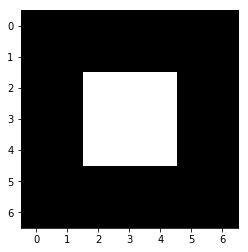

In [3]:
# Creamos una imagen artificial de prueba
img = np.array([[0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)
plt.imshow(img);

## 1. El Elemento Estructurante

Es el elemento que hace las veces de una “máscara de convolución” y define la forma y tamaño de la región que será afectada por las operaciones morfológicas.

Cómo se vio en la teoría, existen diferentes tipos de elementos estructurantes:

In [25]:
# Aquí por ejemplo creamos un elemento estructurante CUADRADO de 3x3
sq = morphology.square(width=2)
print("E.E. Cuadrado: \n", sq)


E.E. Cuadrado: 
 [[1 1]
 [1 1]]


In [5]:
# Aquí creamo un elemento estructurante tipo DIAMANTE de radio 1
dia = morphology.diamond(radius=1)
print("E.E. Cuadrado: \n", dia)

E.E. Cuadrado: 
 [[0 1 0]
 [1 1 1]
 [0 1 0]]


In [6]:
# Consulte la documentación 
# Cree un elemento estructurante de forma CIRCULAR de radio 2
rd = morphology.disk(radius=2)
print("E.E. Redondo: \n", rd)

E.E. Redondo: 
 [[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


El valor central del elemento estructurante representa el píxel considerado, y los valores que lo rodean son los vecinos: un valor 1 significa que el píxel cuenta como un vecino, mientras que un valor 0 no.

## 2. Dilatación

Es una operación que permite agregar pixeles a los objetos en la imagen, haciéndolos más grandes. 

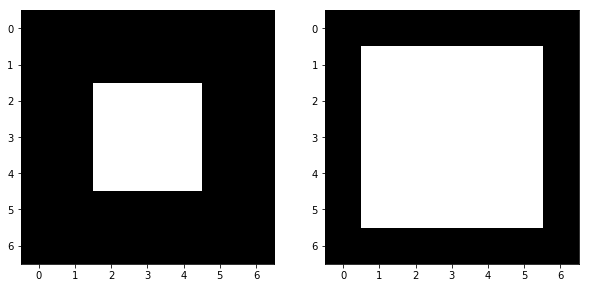

In [7]:
# Aplicamos la operación de DILATACIÓN sobre la imagen img
# Usamos la máscara cuadrada
img_dilatada = morphology.dilation(img, sq)
skdemo.imshow_all(img, img_dilatada)


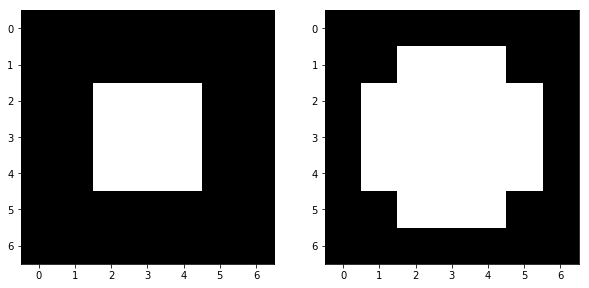

In [8]:
# Aplicamos la operación de DILATACIÓN sobre la imagen img
# Usamos la máscara tipo diamante
img_dilatada = morphology.dilation(img, dia)
skdemo.imshow_all(img, img_dilatada)


## 3. Erosión

Contrario a la Dilatación, esta operación encoge el tamaño de los objetos en la imagen:


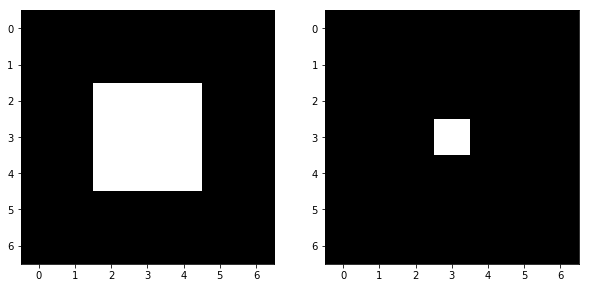

In [9]:
# Aplicamos la operación de EROSION sobre la imagen img
# Usamos la máscara cuadrada
img_erosionada = morphology.erosion(img, sq)
skdemo.imshow_all(img, img_erosionada)


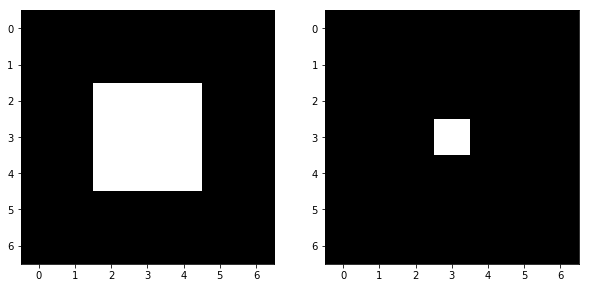

In [10]:
# Aplicamos la operación de EROSION sobre la imagen img
# Usamos la máscara tipo diamante
img_erosionada = morphology.erosion(img, dia)
skdemo.imshow_all(img, img_erosionada)

## 4. Apertura y Cierre

La erosión y la dilatación se pueden combinar en dos operaciones ligeramente más sofisticadas llamadas apertura y cierre. Por ejemplo, considere la siguiente imagen:

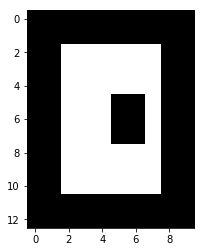

In [19]:
img = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], np.uint8)
plt.imshow(img);

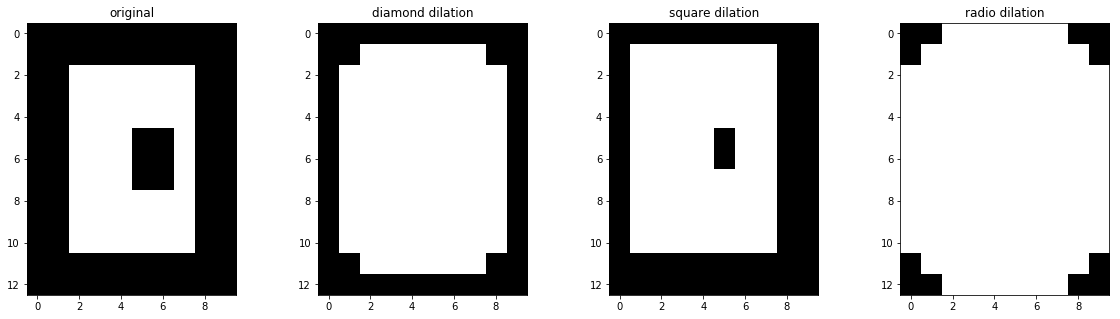

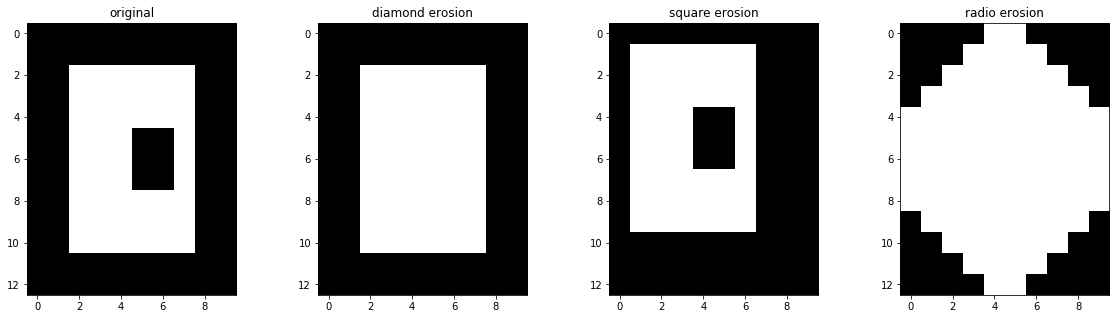

In [26]:
# Antes de implementarlas, imagine como sería el resultado..
# ¿Qué sucede cuando se ejecuta una erosión seguida de una dilatación de esta imagen?
image_result_dilation_diamond = morphology.dilation(img, dia)
image_result_dilation_square = morphology.dilation(img, sq)
image_result_dilation_radio = morphology.dilation(img, rd)

image_result_erosion_diamond = morphology.erosion(image_result_dilation_diamond, dia)
image_result_erosion_square = morphology.erosion(image_result_dilation_square, sq)
image_result_erosion_radio = morphology.erosion(image_result_dilation_radio, rd)

titles_dilation_process = ['original', 'diamond dilation', 'square dilation', 'radio dilation']
titles_erosion_process = ['original', 'diamond erosion', 'square erosion', 'radio erosion']
skdemo.imshow_all(img, image_result_dilation_diamond, image_result_dilation_square, image_result_dilation_radio, titles=titles_dilation_process )
skdemo.imshow_all(img, image_result_erosion_diamond, image_result_erosion_square, image_result_erosion_radio, titles=titles_erosion_process )

# ¿Qué pasa si se aplican alrevés?



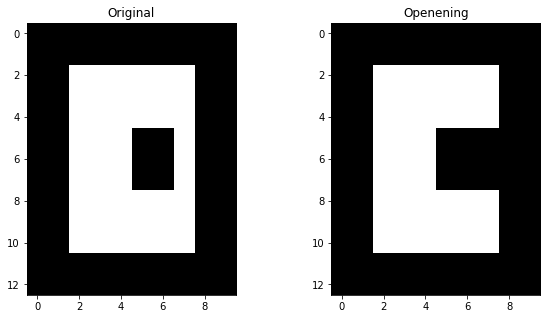

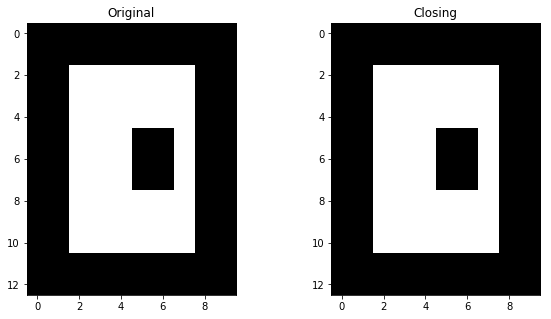

In [27]:
# Los comandos DIRECTOS de estas operaciones son los siguientes:

# Apertura con una máscara cuadrada
img_open = morphology.opening(img, sq) # erosion -> dilatacion
skdemo.imshow_all(img, img_open, titles=["Original", "Openening"]) 

# Cierre con una máscara cuadrada
img_close = morphology.closing(img, sq) # dilatacion -> erosion
skdemo.imshow_all(img, img_close, titles=["Original", "Closing"]) 


<div style="padding:10px; border-radius:10px; border:2px solid #A43D39; background:#EEEEEE">
<span style="color:#A43D39"><h3>**Nota:**</h3></span> <br\>

- **La Apertura** es una operación que suaviza los contornos de los objetos, rompe uniones angostas (istmos), elimina salientes finas y abre pequeños huecos.<br><br>
 
- **El Cierre:** también suaviza los contornos de los objetos pero, a diferencia de la apertura, fusiona las hendiduras finas presentes en los objetos, elimina agujeros pequeños y rellena brechas en el contorno uniendo objetos cercanos.</div>

## 5. Transformacion Top-Hat:

Sustrae a la imagen la apertura de la imagen. Como resultado, esta transformación obtiene los píxeles que se eliminaron para redondear puntos, y las conexiones tipo puente entre los objetos.


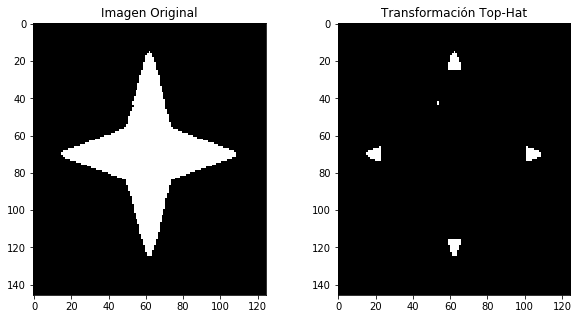

In [13]:
# Aplicación de la transformación Top-Hat

img = color.rgb2gray(io.imread("imagenes/canvas.png"))> 0.5
sq = morphology.square(width=9)

img_wth = morphology.white_tophat(img,selem=sq)
skdemo.imshow_all(img, img_wth, titles=["Imagen Original", "Transformación Top-Hat"])


## 6. Transformada Bottom Hat

Sustrae a la imagen del cierre de la misma, en este sentido, la transformada bottom hat muestra los píxeles que se usaron para rellenar "agujeros", "espacios" y "puentes" en la imagen original.

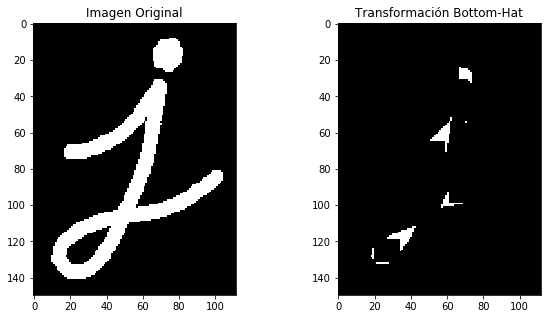

In [14]:
# Aplicación de la transformada Bottom-Hat
img = color.rgb2gray(io.imread("imagenes/j.png"))
sq = morphology.square(width=9)

img_bth = morphology.black_tophat(img,selem=sq)
skdemo.imshow_all(img, img_bth, titles=["Imagen Original", "Transformación Bottom-Hat"])


Las transformadas Top Hat y Bottom Hat comúnmente se aplican sobre imágenes en niveles de gris para remover el fondo de algunas escenas. Por ejemplo, considere la imagen de los arroces:


In [ ]:
# Cargamos la imagen de los arroces
img = io.imread("imagenes/rice.png")

# Creamos un elemento estructurante redondo de radio 12
se = morphology.disk(radius=12)

# Aplicamos la tranformada top hat
img_wth = morphology.white_tophat(img,selem=sq)
img_bth = morphology.black_tophat(img,selem=sq)

skdemo.imshow_all(img, img_wth, img_bth, titles=["Imagen Original", "Transformación Top-Hat", "Transformación Bottom-Hat"])



In [ ]:
#Aplicamos una mejora a la transformada Top Hat
img_wth = exposure.rescale_intensity(img_wth)

plt.imshow(img_wth)

## 7. Otras Operaciones

### Obtención del Esqueleto: 
Reduce los objetos para obtener su “columna vertebral” manteniendo la forma de los mismos.

In [ ]:
# Cargamos la imagen de la j
img_1 = color.rgb2gray(io.imread("imagenes/j.png"))

# Cargamos la imagen del caballo
img_2 = util.invert(data.horse())

# Calculamos el esqueleto
img_1_esq = morphology.skeletonize(img_1)
img_2_esq = morphology.skeletonize(img_2)

skdemo.imshow_all(img_1, img_1_esq, titles=["Original", "Esqueleto"])
skdemo.imshow_all(img_2, img_2_esq, titles=["Original", "Esqueleto"])


### Adelgazamiento:
Es similar al esqueleto, pero en este caso se reducen los objetos a líneas.


In [ ]:
# Calculamos el adelgazamiento
img_1_th = morphology.thin(img_1)
img_2_th = morphology.thin(img_2)

skdemo.imshow_all(img_1, img_1_th, titles=["Original", "Adegazamiento"])
skdemo.imshow_all(img_2, img_2_th, titles=["Original", "Adegazamiento"])

## Entregables de la Práctica

### 1. Uso de las Operaciones Morfológicas:
Utilice las operaciones morfológicas para eliminar el ruido de una imagen binaria: El objetivo es eliminar los objetos más pequeños de la imagen con el fin de aislar lo que representa la galaxia.


In [ ]:
# Inicie aquí el desarrollo de la práctica. Trabaje sobre la imageb hub:

# Esta instrucción se usa para cambiar el tamaño de visualización de las imágenes
plt.rcParams['figure.figsize'] = [8, 6]

hub = color.rgb2gray(data.hubble_deep_field()[350:450, 90:190])
plt.imshow(hub);


### 2. Contando granos y burbujas

Esta imagen de microscopía corresponde a una muestra de vidrio (matriz gris clara) con algunas burbujas (negro) y granos de arena sin fundir (gris oscuro). Deseamos determinar la fracción de la muestra cubierta por estas tres partes y estimar el número de granos de arena y burbujas en la imagen.

In [ ]:
# Inicie aquí el desarrollo de la práctica. Trabaje sobre la imageb hub:

plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['figure.figsize'] = (10, 7)

img = io.imread('imagenes/bubbles.jpg')[:880, :]
plt.imshow(img);

# Use un filtro mediana para limpiar la imagen 


# Visualice la imagen resultante, junto con su histograma


# Umbralice con el fin de obtener los objetos de interés en imágenes diferentes
burbujas = ...
arena = ...
vidrio = ...

# Visualice las imágenes resultantes. RECUERDE EL PROBLEMA DE VISUALIZAR LAS IMÁGENES JUNTAS!


# Aplique las operaciones de apertura y cierra para eliminar el ruido, cerrar huecos en cada imagen



# Componga una imagen a color, tratando cada imagen de las anteriores como un canal y visualicela


# Aplique el algoritmo de componentes conexasa a cada imagen y muestre el resultado usando el mapa de color "spectral"


